### Recap

* Multivarite Normal Distribution
<!-- * $\mathcal{N}(X;\mu,\Sigma) = \frac{1}{\sqrt{\det(\Sigma)(2\pi)^k}} 
  \exp\left( -\frac{1}{2}(X-\mu)^T(\Sigma)^{-1}(X-\mu)\right)$ -->
  
* \begin{aligned}
&\begin{array}{ccc}
\hline \hline \text { Univariate } & \text { Multivariate }  \\
\hline  \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}} & \frac{1}{(2 \pi)^\frac{p}{2}|\Sigma|^{\frac{1}{2}}}e^  \frac{-1}{2}\left((X-\mu)^{T} \Sigma^{-1}(X-\mu)\right)\\
  \sigma^2  & \Sigma \\
 \sigma,\sigma^2 > 0 & \Sigma : \text{Symmetric, Semi Positive Definite (For C.D.)} \\
    \tau & \Lambda \\
% 3 & 31 & 25 & 415 \\
% 4 & 35 & 144 & 23656 \\
% 5 & 45 & 300 & 556 \\
\hline
\end{array}
\end{aligned}

\begin{equation}
\begin{aligned}
&\hat{\mu}=\frac{1}{m} \sum_{i=1}^{m} \mathbf{x}^{(\mathbf{i})}=\overline{\mathbf{x}} \\
&\hat{\Sigma}=\frac{1}{m} \sum_{i=1}^{m}\left(\mathbf{x}^{(\mathbf{i})}-\hat{\mu}\right)\left(\mathbf{x}^{(\mathbf{i})}-\hat{\mu}\right)^{T}
\end{aligned}
\end{equation}

### Today's Lecture
* 3 Ways of defining a Multivariate Normal (MVN) distribution
* Marginalization of MVN distribution
* Conditionalization of MVN distribution
* Sampling of MVN distribution

## 3 Ways of defining a Multivariate Normal distribution

$\mathcal{N}(X;\mu,\Sigma) = \frac{1}{\sqrt{\det(\Sigma)(2\pi)^k}} 
  \exp\left( -\frac{1}{2}(X-\mu)^T(\Sigma)^{-1}(X-\mu)\right)$
  
* $ X\in R^k $
* $ \mu\in R^k $
* $ \Sigma\in R^{kxk} $

So what do you think, will be the Number of parameters required to define a MVN?


The number of parameters in a Multivariate Normal scales quadratically. How can we reduce it? What are the implications

* Full Covariance
* Diagonal Covariance
* Spherical/Isotropical Covariance
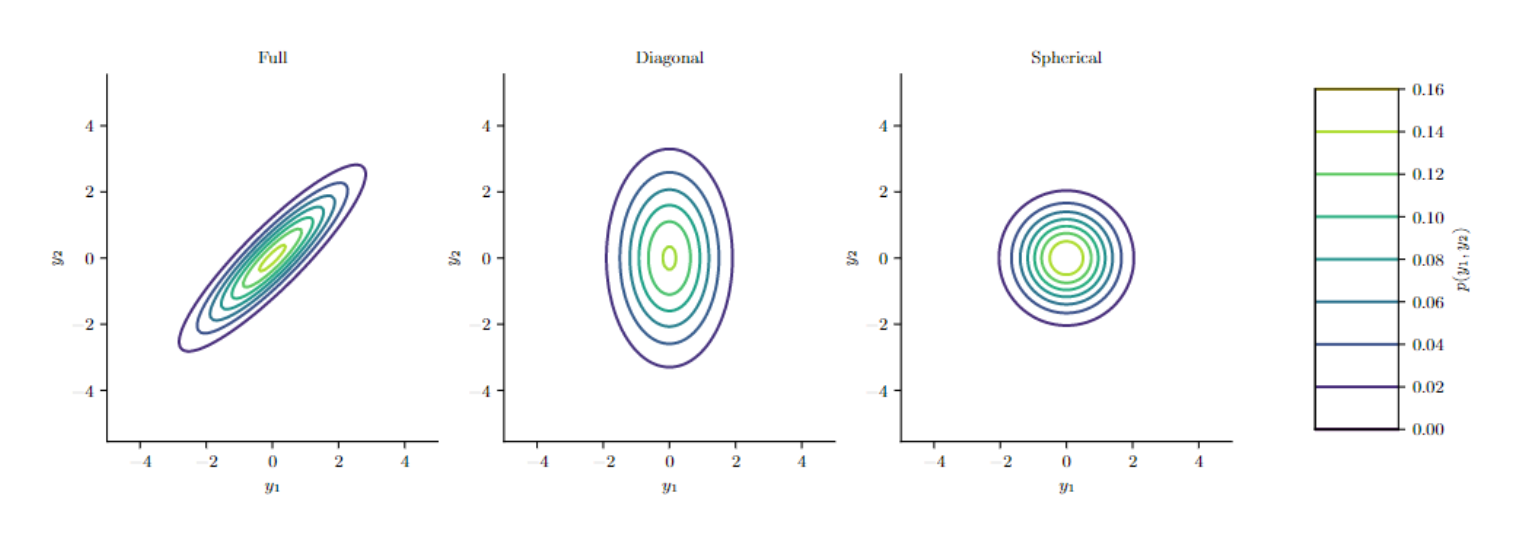

#### Full Covariance
* Needs $k^2$ terms
* Correlation between all the dimensions


#### Diagonal Covariance
* What is a determinant of Matrix? What are the Eigenvalues of diagoanl matrix? What is the Inverse of a diagonal matrix?
* Easy in calculating PDF

#### Spherical/Isotropical Covariance
* $\Sigma = \sigma^2I$
* So how does the pdf look like? (ignore the normalization!)

In [ ]:
import jax
import jax.numpy as jnp
import distrax
import matplotlib.pyplot as plt
key = jax.random.PRNGKey(42)
jax.config.update("jax_enable_x64", True)

plt.ion()
plt.figure()
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.grid()

#Full Covariance
covariance = jnp.array([[2.0, 1.0], [1.0, 3.0]])
L = jnp.linalg.cholesky(covariance)
X_full = distrax.MultivariateNormalTri(loc=jnp.array([2,2]),scale_tri=L, is_lower=True)

data_full = X_full.sample(seed = key, sample_shape = (500,))

plt.scatter(data_full[:,0], data_full[:,1])

#Diagonal Covariance
X_diag = distrax.MultivariateNormalDiag(loc=jnp.array([-2,0]),scale_diag=jnp.array([1.0,4.0]))
data_diag = X_diag.sample(seed = key, sample_shape = (500,))
plt.scatter(data_diag[:,0], data_diag[:,1])
X_spherical = distrax.MultivariateNormalDiag(loc=jnp.array([5,-5]),scale_diag=2.0*jnp.ones(2))

data_spherical = X_spherical.sample(seed = key, sample_shape = (500,))

plt.scatter(data_spherical[:,0], data_spherical[:,1])

#Alternative way to define 
X_spherical1 = distrax.Normal(loc=jnp.array([-7,5]),scale=1.0)

X= spherical1 = distrax.Independent(X_spherical1, reinterpreted_batch_ndims=1)
data_spherical1 = X_spherical1.sample(seed = key, sample_shape = (500,))

plt.scatter(data_spherical1[:,0], data_spherical1[:,1])

## Marginal and Conditional

* Let's say:

    $X_a \in \left[[X_1], [X_2], [X_3] \right] $
    
    $X_b \in \left[[X_4], [X_5] \right] $
    
    $X \in \left[[X_a], [X_b] \right] $
    
    $ \mu \in \left[[\mu_a], [\mu_b] \right] $
     
    $ \Sigma \in \left[[\Sigma_{aa}], [\Sigma_{ab}], , [\Sigma_{ba}], [\Sigma_{bb}] \right] $
    
Now what can we say about $P(X_a)?$, $P(X_b)?$, $P(X_a|X_b)?$ or $P(X_b|X_a)?$ 

#### Marginalization of MVN

* Interaction between dimensions no longer relevant!!

* $P(X_a) = \mathcal{N}(X_a;\mu_a,\Sigma_{aa})$
* $P(X_b) = \mathcal{N}(X_b;\mu_b,\Sigma_{bb})$

In [ ]:
import seaborn as sns
def marginal(a,b,cor):
  data = jax.random.multivariate_normal(key, mean = jnp.array([0, 0]), cov = jnp.array([[a, cor], [cor, b]]), shape=(5000, ))

  a = sns.jointplot(x = data[:,0], y = data[:,1],
                kind = "reg", data = data,fit_reg = False,marginal_kws=dict(bins=30, fill=False))

#### Conditionalization of MVN

$ P(X_a | X_b) = \frac{P(X_a,X_b)}{P(X_b)}$

But to represent conditional probability in terms of  $\sim \mathcal{N}(X_a;\bar{\mu}, \bar{\Sigma})$;

$ P(X_a | X_b) \sim P(X_a,X_b)$




<p>Then the distribution of $X_a$ conditional on $X_b=B$ is multivariate normal $(X_a|X_b=B)\sim \mathcal{N}(X_a;\bar{\mu}, \bar{\Sigma})$, thus the mean vector</p> 
$$
\bar{\boldsymbol\mu}
=
\boldsymbol\mu_a + \boldsymbol\Sigma_{ab} \boldsymbol\Sigma_{bb}^{-1}
\left(
 \mathbf{X_b} - \boldsymbol\mu_b
\right)
$$<p>and covariance matrix</p>
$$
\overline{\boldsymbol\Sigma}
=
\boldsymbol\Sigma_{aa} - \boldsymbol\Sigma_{ab} \boldsymbol\Sigma_{bb}^{-1} \boldsymbol\Sigma_{ba}.
$$


## Sampling of MVN distribution


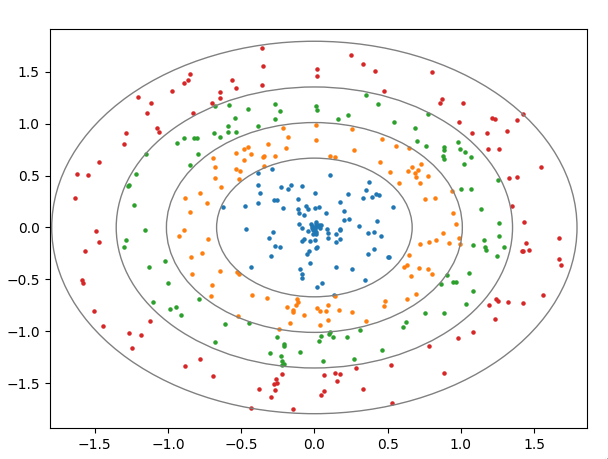
##### The Goal: 
To generate samples from arbitary multivariate distribution we first generate samples from standard multivariate normal distribution.

Let $ X \sim \mathcal{N}(0, 1)$.

For Univariate Case;  $ Y \sim \mathcal{N}(\mu, \sigma^2)$:
* We generate samples as follows:
 * $Y = \mu + \sigma(X)$ 
 
Similarly, 
Let $ \bar{X} \sim \mathcal{N}(0, 1)$.
Hence if we wish to generate 1 sample from $\bar{X}$ we need to generate K samples from X.
  * This can be done using any sampling techniques

Thus, for Multivariate Case;   $ Y \sim \mathcal{N}(\bar{\mu}, \bar{\Sigma})$;
* We generate samples as follows:
    * $Y = \bar{\mu} + L(\bar{X})$ 

In [ ]:
plt.ion()
plt.figure()

X = jax.random.normal(key, shape=(1000,2))

plt.scatter(X[:,0],X[:,1])

mu = jnp.array([2,3])
cov = jnp.array([[2.0,0.5],[0.5,1.0]])

L = jnp.linalg.cholesky(cov)

Y = mu + jnp.dot(X,L.T)

plt.scatter(Y[:,0],Y[:,1])

### Summary

* The number of parameters in a Multivariate Normal scales quadratically, hence we reduce it by defining 3 Covariances.
    * Using Diagonal or Spherical Covarince gives no information about correlation.
* Defining marginal and condirional MVN distibution.
* Sampling from MVN distribution.